In [3]:
import tensorflow as tf 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import scipy
import os
import cv2
import random
from skimage import io
import seaborn as sns
from matplotlib import pyplot 
import pandas as pd
import tensorflow.keras.backend as K
import numpy as np
np.random.seed(13)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2.7.0-dev20210830


In [ ]:
NasNet = tf.keras.models.load_model('my_firstModel')
MobileNet = tf.keras.models.load_model('my_secondModel')
MobileNetV2 = tf.keras.models.load_model('my_thirdModel')
EfficientNet = tf.keras.models.load_model('my_forthModel')
TrainedModel_0 = [NasNet,MobileNet,MobileNetV2,EfficientNet]
TrainedModel_1 = [NasNet,MobileNet]
TrainedModel_2 = [MobileNetV2,EfficientNet]
TrainedModel_3 = [NasNet,EfficientNet]
TrainedModel_4 = [MobileNet,MobileNetV2]
TrainedModel_5 = [NasNet,MobileNet,MobileNetV2]
TrainedModel_6 = [MobileNet,MobileNetV2,EfficientNet]
TrainedModel_7 = [NasNet,MobileNet,EfficientNet]
TrainedModel_8 = [NasNet,MobileNetV2,EfficientNet]

In [5]:
#Changed to working directory to the location of the dataset and loaded the dataset description for local host.
os.chdir("..\kaggle_3m")
brain_df = pd.read_csv('data_frame.csv')

#For google colab
#brain_df = pd.read_csv('/content/drive/MyDrive/kaggle_3m/Gdrive.csv')
# Here we decided to drop unncessary coloums from the dataset
brain_df_train = brain_df.drop(columns=['Unnamed: 0', 'patient'], axis=1)
brain_df_train['diagnosis'] = brain_df['diagnosis'].apply(lambda x: str(x)) #changes the type of the values of the column to sting
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   diagnosis   3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [6]:
train, test = train_test_split(brain_df_train, test_size=0.15) #splits the data into training and testing sets
datagen = ImageDataGenerator(rescale=1./255., validation_split=0.1)

train_generator = datagen.flow_from_dataframe(train,
                                              directory='./',
                                              x_col='image_path',
                                              y_col='diagnosis',
                                              subset='training',
                                              class_mode='categorical',
                                              batch_size=16,
                                              shuffle=True,
                                              target_size=(224,224)
                                             )
valid_generator = datagen.flow_from_dataframe(train,
                                              directory='./',
                                              x_col='image_path',
                                              y_col='diagnosis',
                                              subset='validation',
                                              class_mode='categorical',
                                              batch_size=16,
                                              shuffle=True,
                                              target_size=(224,224)
                                             )
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_dataframe(test,
                                                  directory='./',
                                                  x_col='image_path',
                                                  y_col='diagnosis',
                                                  class_mode='categorical',
                                                  batch_size=16,
                                                  shuffle=False,
                                                  target_size=(224,224)
                                                 )

Found 3006 validated image filenames belonging to 2 classes.
Found 333 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [9]:
#For TrainedModel_0
labels_0 = [] 
for m in TrainedModel_0:
    predicts = np.argmax(m.predict(test_generator), axis=1)
    labels_0.append(predicts)
# Ensemble with voting
labels_0 = np.array(labels_0)
labels_0 = np.transpose(labels_0, (1, 0))
labls_0 = scipy.stats.mode(labels_0,axis=1)[0]
labls_0 = np.squeeze(labls_0)


#For TrainedModel_1
labels_1 = [] 
for m in TrainedModel_1:
    predicts = np.argmax(m.predict(test_generator), axis=1)
    labels_1.append(predicts)
# Ensemble with voting
labels_1 = np.array(labels_1)
labels_1 = np.transpose(labels_1, (1, 0))
labls_1 = scipy.stats.mode(labels_1,axis=1)[0]
labls_1 = np.squeeze(labls_1)

#For TrainedModel_2
labels_2 = [] 
for m in TrainedModel_2:
    predicts = np.argmax(m.predict(test_generator), axis=1)
    labels_2.append(predicts)
# Ensemble with voting
labels_2 = np.array(labels_2)
labels_2 = np.transpose(labels_2, (1, 0))
labls_2 = scipy.stats.mode(labels_2,axis=1)[0]
labls_2 = np.squeeze(labls_2)

#For TrainedModel_3
labels_3 = [] 
for m in TrainedModel_3:
    predicts = np.argmax(m.predict(test_generator), axis=1)
    labels_3.append(predicts)
# Ensemble with voting
labels_3 = np.array(labels_3)
labels_3 = np.transpose(labels_3, (1, 0))
labls_3 = scipy.stats.mode(labels_3,axis=1)[0]
labls_3 = np.squeeze(labls_3)

#For TrainedModel_4
labels_4 = [] 
for m in TrainedModel_4:
    predicts = np.argmax(m.predict(test_generator), axis=1)
    labels_4.append(predicts)
# Ensemble with voting
labels_4 = np.array(labels_4)
labels_4 = np.transpose(labels_4, (1, 0))
labls_4 = scipy.stats.mode(labels_4,axis=1)[0]
labls_4 = np.squeeze(labls_4)

#For TrainedModel_5
labels_5 = [] 
for m in TrainedModel_5:
    predicts = np.argmax(m.predict(test_generator), axis=1)
    labels_5.append(predicts)
# Ensemble with voting
labels_5 = np.array(labels_5)
labels_5 = np.transpose(labels_5, (1, 0))
labls_5 = scipy.stats.mode(labels_5,axis=1)[0]
labls_5 = np.squeeze(labls_5)

#For TrainedModel_6
labels_6 = [] 
for m in TrainedModel_6:
    predicts = np.argmax(m.predict(test_generator), axis=1)
    labels_6.append(predicts)
# Ensemble with voting
labels_6 = np.array(labels_6)
labels_6 = np.transpose(labels_6, (1, 0))
labls_6 = scipy.stats.mode(labels_6,axis=1)[0]
labls_6 = np.squeeze(labls_6)

#For TrainedModel_7
labels_7 = [] 
for m in TrainedModel_7:
    predicts = np.argmax(m.predict(test_generator), axis=1)
    labels_7.append(predicts)
# Ensemble with voting
labels_7 = np.array(labels_7)
labels_7 = np.transpose(labels_7, (1, 0))
labls_7 = scipy.stats.mode(labels_7,axis=1)[0]
labls_7 = np.squeeze(labls_7)

#For TrainedModel_8
labels_8 = [] 
for m in TrainedModel_8:
    predicts = np.argmax(m.predict(test_generator), axis=1)
    labels_8.append(predicts)
# Ensemble with voting
labels_8 = np.array(labels_8)
labels_8 = np.transpose(labels_8, (1, 0))
labls_8 = scipy.stats.mode(labels_8,axis=1)[0]
labls_8= np.squeeze(labls_8)

In [10]:
original = np.asarray(test['diagnosis']).astype('int')

c:\users\hi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       380
           1       0.98      0.81      0.89       210

    accuracy                           0.93       590
   macro avg       0.94      0.90      0.92       590
weighted avg       0.93      0.93      0.93       590

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       380
           1       0.95      0.92      0.94       210

    accuracy                           0.96       590
   macro avg       0.95      0.95      0.95       590
weighted avg       0.96      0.96      0.96       590

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       380
           1       0.00      0.00      0.00       210

    accuracy                           0.64       590
   macro avg       0.32      0.50      0.39       590
weighted avg       0.41      0.64      0.50       590

              preci

<AxesSubplot:>

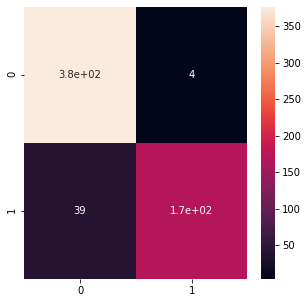

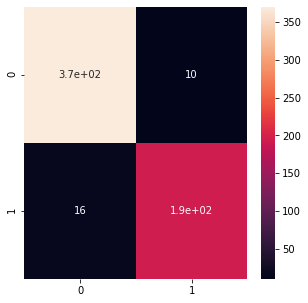

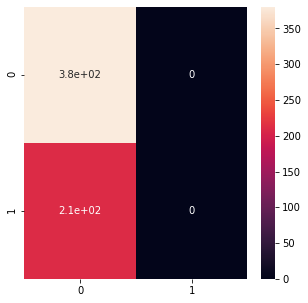

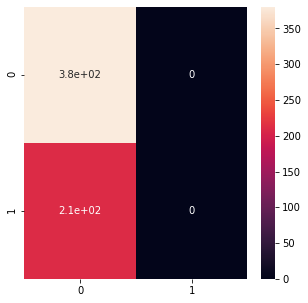

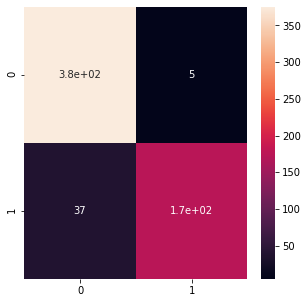

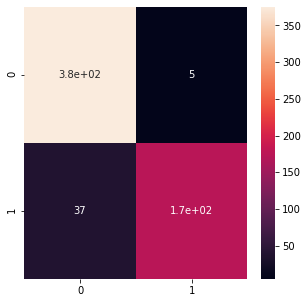

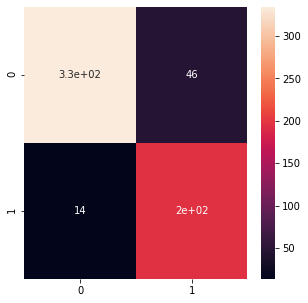

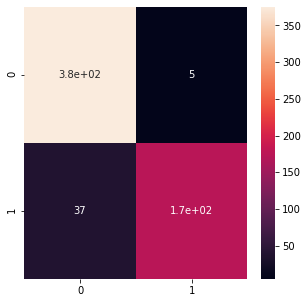

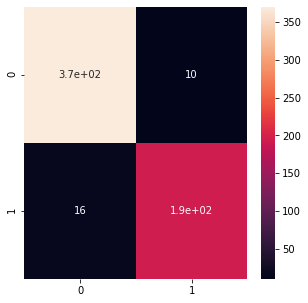

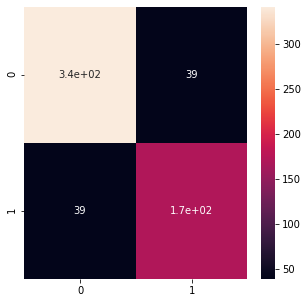

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

cm_0 = confusion_matrix(original, labls_0)
cm_1 = confusion_matrix(original, labls_1)
cm_2 = confusion_matrix(original, labls_2)
cm_3 = confusion_matrix(original, labls_3)
cm_4 = confusion_matrix(original, labls_4)
cm_5 = confusion_matrix(original, labls_5)
cm_6 = confusion_matrix(original, labls_6)
cm_7 = confusion_matrix(original, labls_7)
cm_8 = confusion_matrix(original, labls_8)

report_0 = classification_report(original, labls_0, labels = [0,1])
report_1 = classification_report(original, labls_1, labels = [0,1])
report_2 = classification_report(original, labls_2, labels = [0,1])
report_3 = classification_report(original, labls_3, labels = [0,1])
report_4 = classification_report(original, labls_4, labels = [0,1])
report_5 = classification_report(original, labls_5, labels = [0,1])
report_6 = classification_report(original, labls_6, labels = [0,1])
report_7 = classification_report(original, labls_7, labels = [0,1])
report_8 = classification_report(original, labls_8, labels = [0,1])

print(report_0)
pyplot.figure(figsize = (5,5))
sns.heatmap(cm_0, annot=True)

print(report_1)
pyplot.figure(figsize = (5,5))
sns.heatmap(cm_1, annot=True)  

print(report_2)
pyplot.figure(figsize = (5,5))
sns.heatmap(cm_2, annot=True)  

print(report_3)
pyplot.figure(figsize = (5,5))
sns.heatmap(cm_3, annot=True) 

print(report_4)
pyplot.figure(figsize = (5,5))
sns.heatmap(cm_4, annot=True)


print(report_5)
pyplot.figure(figsize = (5,5))
sns.heatmap(cm_5, annot=True)

print(report_6)
pyplot.figure(figsize = (5,5))
sns.heatmap(cm_6, annot=True)

print(report_7)
pyplot.figure(figsize = (5,5))
sns.heatmap(cm_7, annot=True)

print(report_8)
pyplot.figure(figsize = (5,5))
sns.heatmap(cm_8, annot=True)

<AxesSubplot:>

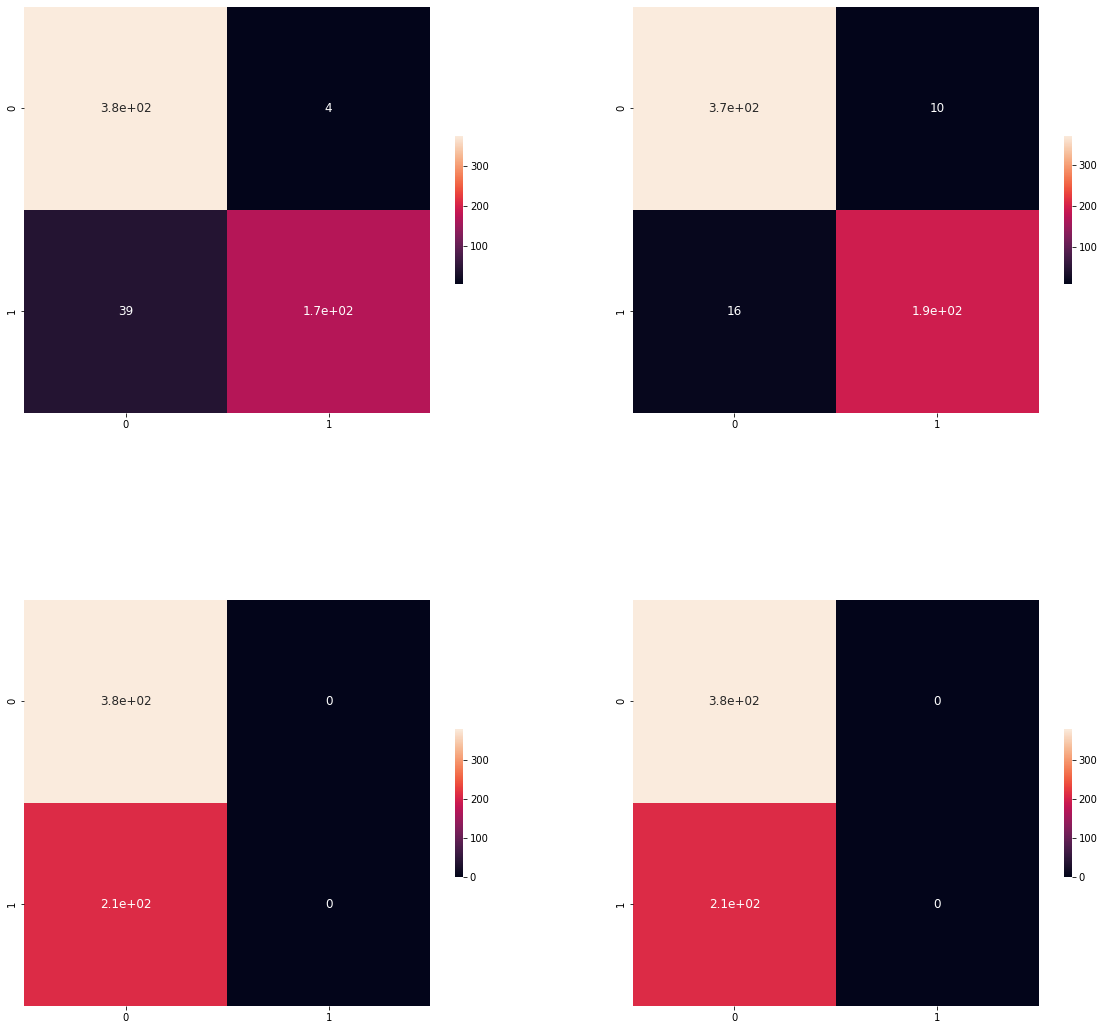

In [33]:
# Here we create a figure instance, and two subplots
fig = plt.figure(figsize = (20,20)) # width x height
ax1 = fig.add_subplot(2, 2, 1) # row, column, position
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)




# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(cm_0, ax=ax1,  square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(cm_1, ax=ax2,  square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(cm_2, ax=ax3,  square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(cm_3, ax=ax4,  square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})


<AxesSubplot:>

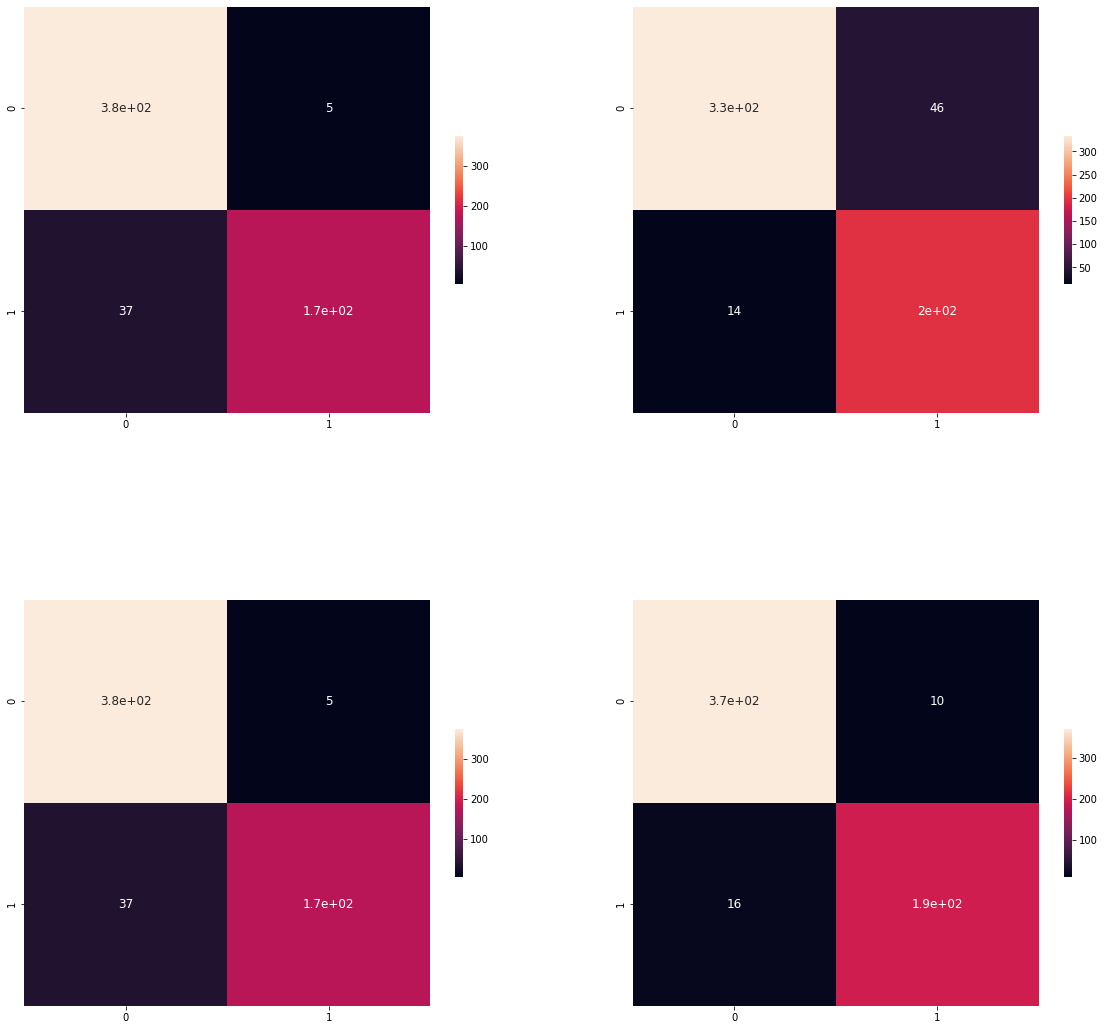

In [34]:

fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.heatmap(cm_4, ax=ax1,  square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(cm_5, ax=ax2,  square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(cm_6, ax=ax3,  square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(cm_7, ax=ax4,  square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})


<AxesSubplot:>

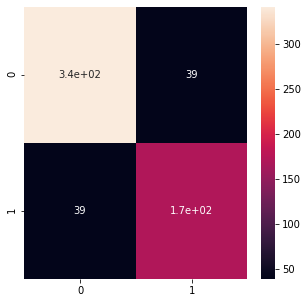

In [35]:
pyplot.figure(figsize = (5,5))
sns.heatmap(cm_8, annot=True)

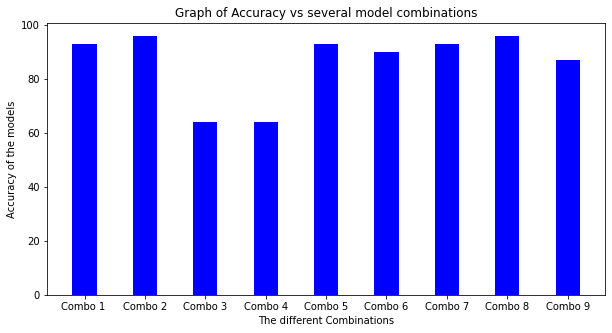

In [36]:
#plot graphs
data = {'Combo 1 ':93, 'Combo 2':96, 'Combo 3':64,
        'Combo 4':64, 'Combo 5':93, 'Combo 6':90, 'Combo 7':93, 'Combo 8':96,'Combo 9':87}
names = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, values, color ='blue',
        width = 0.4)
 
plt.xlabel("The different Combinations")
plt.ylabel("Accuracy of the models")
plt.title("Graph of Accuracy vs several model combinations")
plt.show()

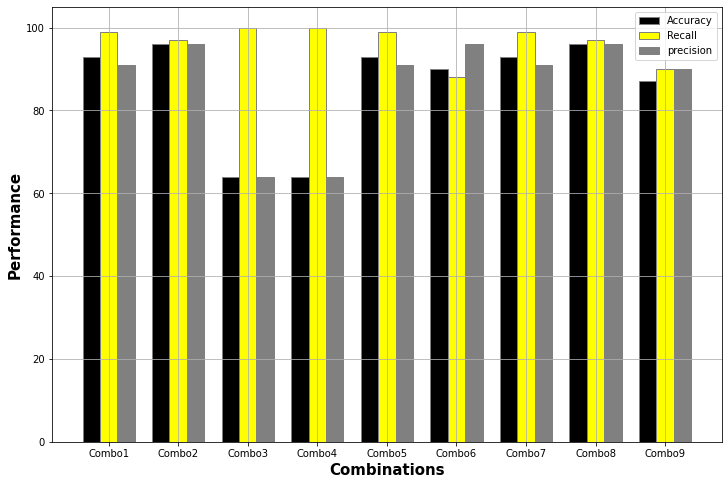

Backing off send_request(...) for 22.3s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000010F7FB3C190>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))
Backing off send_request(...) for 501.4s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000010F7FB3C160>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))
Giving up send_request(...) after 11 tries (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000010F7FB3C190>: Failed to establish a new connect

In [4]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Accuracy = [93, 96, 64, 64, 93, 90, 93, 96, 87]
Precision = [91, 96, 64, 64, 91, 96, 91, 96, 90]
Recall = [99, 97, 100, 100, 99, 88, 99, 97, 90]
 
# Set position of bar on X axis
br1 = np.arange(len(Recall))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
 
# Make the plot
plt.bar(br1, Accuracy, color ='black', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Recall, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br3, Precision, color ='grey', width = barWidth,
        edgecolor ='grey', label ='precision')

 
# Adding Xticks
plt.xlabel('Combinations', fontweight ='bold', fontsize = 15)
plt.ylabel('Performance', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Recall))],
        ['Combo1', 'Combo2', 'Combo3', 'Combo4', 'Combo5','Combo6', 'Combo7', 'Combo8', 'Combo9'])
plt.grid() 
plt.legend()
plt.show()